In [197]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
import sklearn.preprocessing as pre
import sklearn.metrics as mt

In [198]:
def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy


def non_func(n):
    x = np.linspace(1,10,n)
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    y_measured = add_noise(y)
    data = np.concatenate((x,y,y_measured),axis = 0)
    data = data.reshape(3,n)
    return data.T

In [199]:
train = non_func(500)
test = non_func(500)

train_X = train[:, 0]
train_X = train_X.reshape(-1,1)
#train_Y = train[:, 1]
train_Y = train[:, 2]

test_X = test[:, 0]
test_X = test_X.reshape(-1,1)
test_Y = test[:, 1]

In [200]:
mlp = nn.MLPRegressor((10,15,15,20), max_iter=1000, learning_rate='adaptive')
mlp.fit(train_X, train_Y)

MLPRegressor(hidden_layer_sizes=(10, 15, 15, 20), learning_rate='adaptive',
             max_iter=1000)

In [201]:
prediction = mlp.predict(test_X)
mse = mt.mean_squared_error(test_Y, prediction)
print("mse = {}".format(mse))

mse = 0.017827081469262734


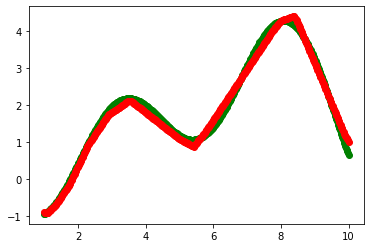

In [202]:
plt.plot(test_X, test_Y, 'og')
plt.plot(test_X, prediction, 'or')
plt.show()